# Medical Insurance cost prediciton

## Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

## Content
## Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

## Inspiration
Can you accurately predict insurance costs?

Predicting insurance cost is type of regression problem. Hence we will choose regression algorithm to train model but as of now.
We have not any idea about relation ship between features and target label whether the relation ship is linear or not.
So we will decide which model to use for training once we will explore data later.

## Select a Performance Measure
Your next step is to select a performance measure. A typical performance measure for
regression problems is the Root Mean Square Error (RMSE). It gives an idea of how
much error the system typically makes in its predictions, with a higher weight for
large errors. Equation 2-1 shows the mathematical formula to compute the RMSE.
Equation 2-1. Root Mean Square Error (RMSE)


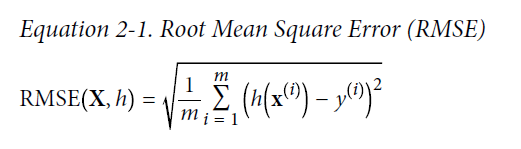

Even though RMSE is prefered metric to but in some scenario we may prefer some other metric when we have many outlier we can choose Mean Absolute Error metric

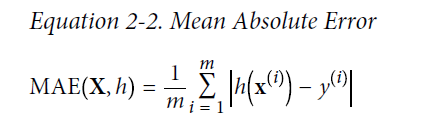

In [1]:
print("Hello Avnish! this is your program")

Hello Avnish! this is your program


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_insurance_csv():
    return pd.read_csv("insurance.csv")

In [4]:
insurance_df=load_insurance_csv()

In [5]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance_df.describe(include="all")


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


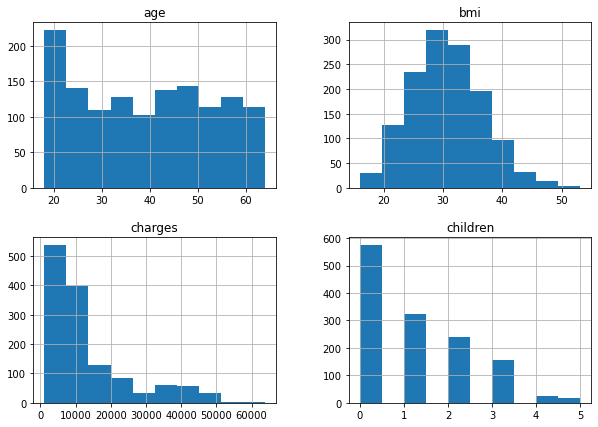

In [11]:
a=insurance_df.hist(figsize=(10,7))

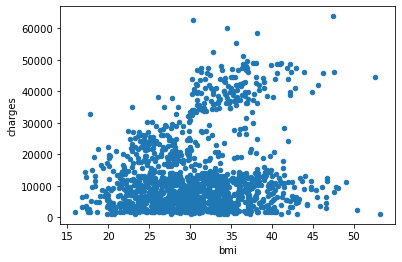

In [14]:
insurance_df.plot(kind="scatter",x='bmi',y='charges')

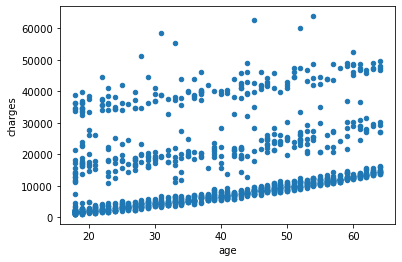

In [16]:
insurance_df.plot(kind="scatter",x='age',y='charges')

In [42]:
insurance_df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

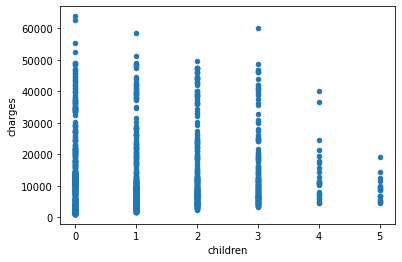

In [18]:
insurance_df.plot(kind="scatter",x="children",y="charges")

In [19]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
insurance_df.groupby(by=['region'],axis=0).mean()[['charges']]

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [43]:
from pandas.plotting import scatter_matrix

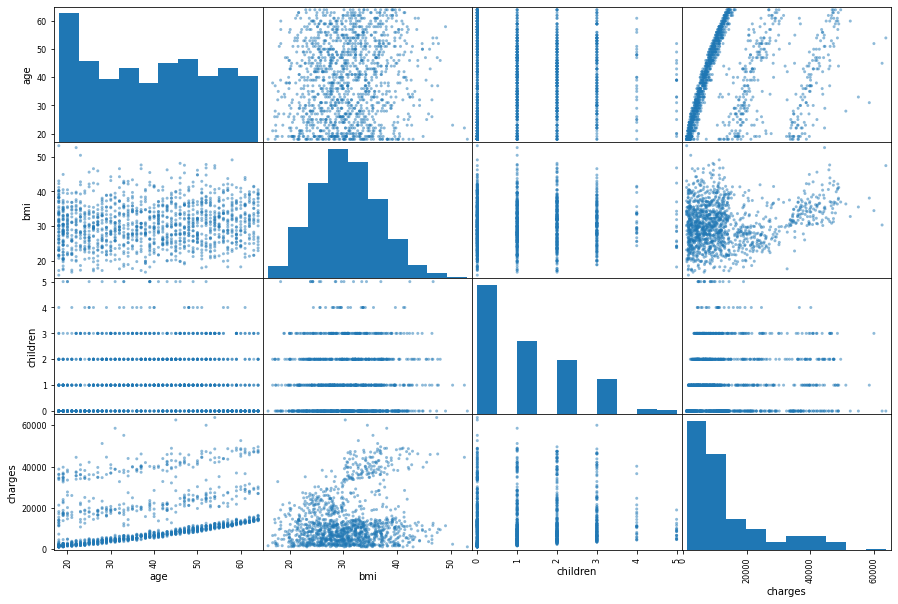

In [46]:
scatter_matrix(insurance_df,figsize=(15,10))
plt.show()

In [48]:
insurance_df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

## handling categorical variable

In [49]:
from sklearn.preprocessing import OrdinalEncoder


In [50]:
ordinalEncoder=OrdinalEncoder()

In [51]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
sex_encoded=ordinalEncoder.fit_transform(insurance_df[['sex']])

In [56]:
insurance_df['sex_encoded']=sex_encoded

In [58]:
ordinalEncoder.categories_

[array(['female', 'male'], dtype=object)]

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
oneHotEncoder=OneHotEncoder()

In [61]:
region_one_hot_encoding=oneHotEncoder.fit_transform(insurance_df[['region']])

In [63]:
region_one_hot_encoding.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [65]:
oneHotEncoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]